<a href="https://colab.research.google.com/github/amandatz/computational-linear-algebra/blob/main/Atividade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 5

Amanda Topanotti Zanette (22100776)

**Importações e funções auxiliares**

In [75]:
using LinearAlgebra
using Plots

Esse trecho de código é usado apenas para garantir a repetibilidade dos números aleatórios gerados.

In [76]:
using Random
Random.seed!(123)

TaskLocalRNG()

### Questão 1

Primeiro iremos gerar os 100 pontos aleatórios $x_i$ e construir $X$.

In [77]:
n = 100
X = rand(2, n)

2×100 Matrix{Float64}:
 0.475949  0.69342   0.418591   0.456048  …  0.429512  0.973466  0.205152
 0.567563  0.887804  0.0378317  0.243963     0.832818  0.241046  0.728238

Logo, pode-se construir a matriz $D$ da seguinte forma:

In [78]:
D = [sum((X[:,i] - X[:,j]).^2) for i in 1:n, j in 1:n];

### Questão 2

Primeiro iremos construir a matriz $J = I - \frac{1}{n} e e^T$

In [79]:
I_n = Matrix{Float64}(I, n, n)
e = ones(n)
eeT = e * e'
J = I_n - (1/n) * eeT;

Agora, calculemos $G= -\frac{1}{2}JDJ$

In [80]:
G = -0.5 * J * D * J;

A matriz $G$ contém erros de ponto flutuante. Portanto, estarei forçando que a matriz seja real e simétrica para eliminar pequenas partes imaginárias que prejudicam a decomposição espectral.

In [81]:
G = real.(G)
G = (G + G') / 2;

Para obter $Y=\sqrt\Lambda_rQ_r^T$, precisamos encontrar a decomposição espectral $G=Q \Lambda Q^T$.

In [82]:
function decomposicao_espectral(G::AbstractMatrix; tol=1e-10)
    # Decomposição espectral
    eig = eigen(G)
    lamb = eig.values
    Q = eig.vectors

    # Ordena autovalores em ordem decrescente
    idxs = sortperm(lamb, rev=true)
    lamb_sorted = lamb[idxs]
    Q_sorted = Q[:, idxs]

    # Seleciona autovalores positivos
    inds_pos = findall(lamb_sorted .> tol)
    Lambda_r = Diagonal(lamb_sorted[inds_pos])
    Q_r = Q_sorted[:, inds_pos]

    return Q_r, Lambda_r
end

decomposicao_espectral (generic function with 1 method)

In [83]:
Q_r, Lambda_r = decomposicao_espectral(G)
Y = sqrt.(Lambda_r) * Q_r'

2×100 Matrix{Float64}:
  0.0804714   0.228153  -0.330238  …   0.327495  -0.465966  0.363663
 -0.0103723  -0.368196   0.329072     -0.117593  -0.246046  0.127287

### Questão 3

In [84]:
Xc = X*J
Yc = Y*J

2×100 Matrix{Float64}:
  0.0804714   0.228153  -0.330238  …   0.327495  -0.465966  0.363663
 -0.0103723  -0.368196   0.329072     -0.117593  -0.246046  0.127287

Veja que esse é um problema de Procrustes Ortogonal cuja solução é dada ao calcular a SVD de $Y_c X_c^T = W \Sigma V^T$ e a matriz ótima $U=WV^T$.

In [85]:
F = svd(Yc * Xc')
U = F.U * F.Vt
residual = norm(U * Yc - Xc, 2)

6.654820007725801

Observe que, de fato, o a matriz $U$ é ortogonal com excessão de algum resíduo.

In [86]:
U*U'

2×2 Matrix{Float64}:
 1.0          2.22045e-16
 2.22045e-16  1.0

### Questão 4

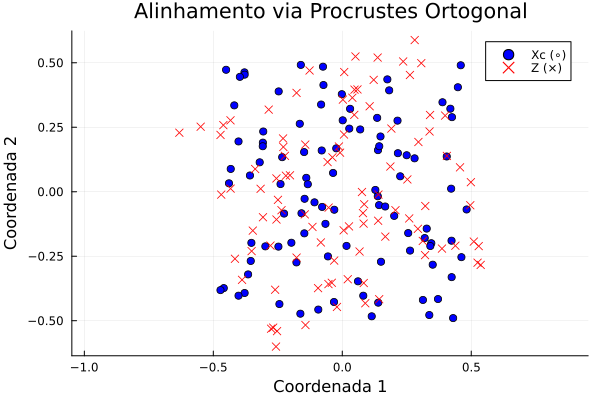

In [87]:
Z = U * Yc

plt = scatter(Xc[1, :], Xc[2, :],
             markershape=:circle, markercolor=:blue, label="Xc (∘)",
             xlabel="Coordenada 1", ylabel="Coordenada 2",
             title="Alinhamento via Procrustes Ortogonal",
             aspect_ratio=:equal)

scatter!(plt, Z[1, :], Z[2, :],
         markershape=:xcross, markercolor=:red, label="Z (×)",
         legend=:topright)

display(plt)
